## Setup

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import json
import glob

## Helper Functions

In [7]:
def load_and_process_data(folder_path):
    """Load JSON files from folder and return a pivot table."""
    json_files = glob.glob(f"{folder_path}/*.json")
    data = []
    for file in json_files:
        with open(file, 'r') as f:
            json_data = json.load(f)
            data.append({
                "Document Depth": json_data.get("depth_percent", None),
                "Context Length": json_data.get("context_length", None),
                "Score": json_data.get("score", None)
            })
    df = pd.DataFrame(data)
    pivot_table = pd.pivot_table(df, values='Score', index=['Document Depth', 'Context Length'], aggfunc='mean').reset_index()
    pivot_table = pivot_table.pivot(index="Document Depth", columns="Context Length", values="Score")
    return pivot_table

In [8]:
def plot_heatmap(pivot_table, title):
    """Plot the heatmap for a given pivot table."""
    cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot_table,
        cmap=cmap,
        cbar_kws={'label': 'Score'},
        vmin=0, vmax=100)
    plt.title(title)
    plt.xlabel('Token Limit')
    plt.ylabel('Depth Percent')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [9]:
def plot_multiple_heatmaps(folder_paths, titles):
    """Given 4 folder paths and titles, plot 4 heatmaps inline."""
    plt.figure(figsize=(24, 12))
    for i, (folder, title) in enumerate(zip(folder_paths, titles), 1):
        pivot_table = load_and_process_data(folder)
        plt.subplot(2, 2, i)
        cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])
        sns.heatmap(
            pivot_table,
            cmap=cmap,
            cbar_kws={'label': 'Score'},
            vmin=0, vmax=100)
        plt.title(title)
        plt.xlabel('Token Limit')
        plt.ylabel('Depth Percent')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Generate Visualisation

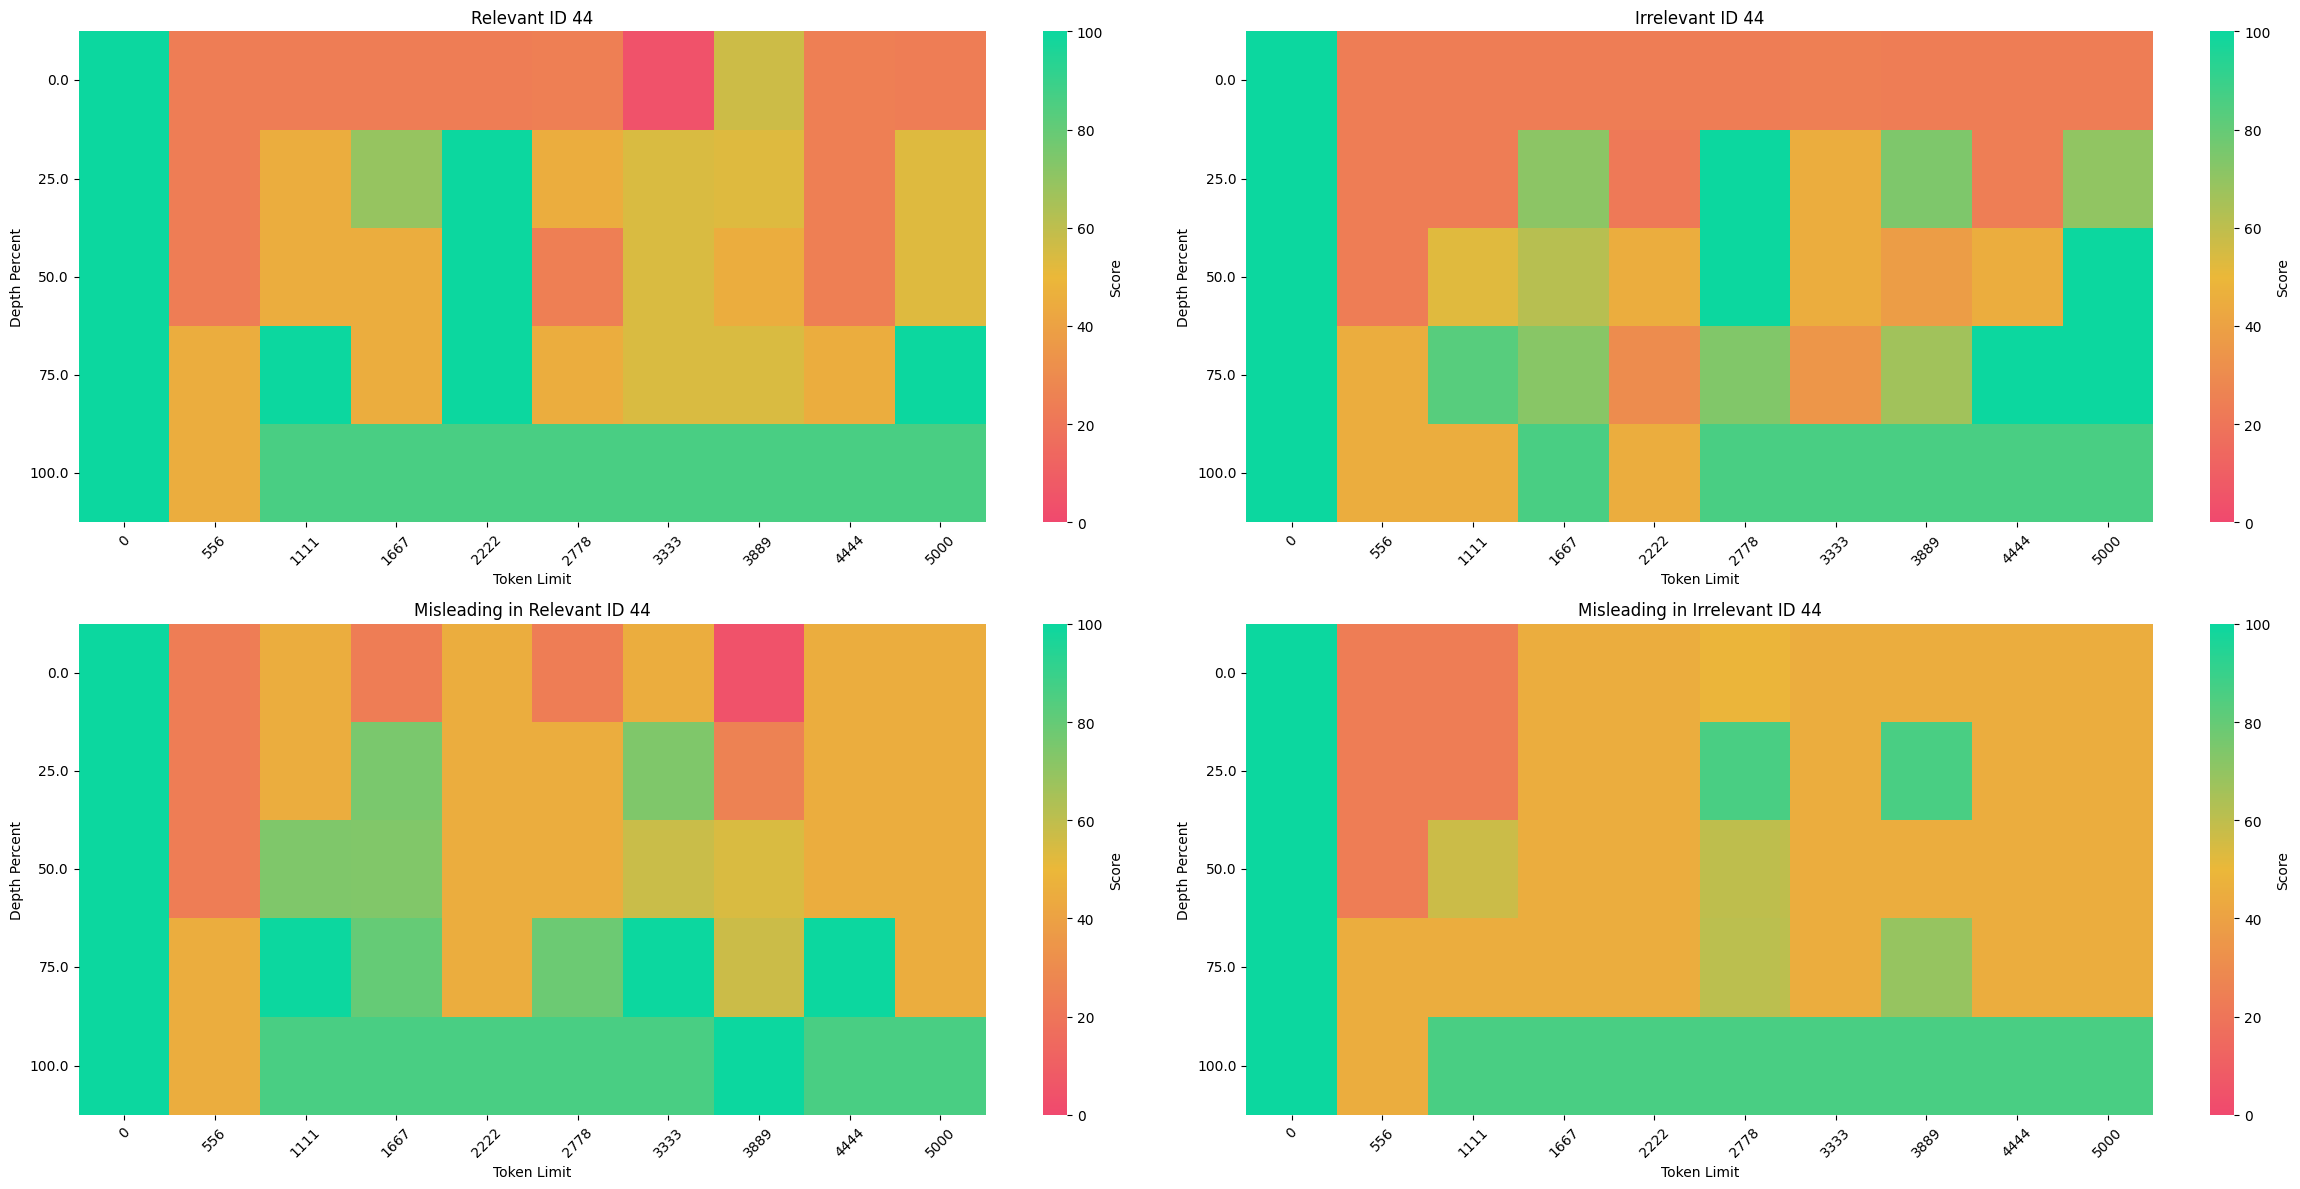

In [10]:
# Example usage:
folder_paths = [
    "results/graph/llama-2-7b-80k_relevant_id_44",
    "results/graph/llama-2-7b-80k_irrelevant_id_44",
    "results/graph/llama-2-7b-80k_relevant_id_44_misleading",
    "results/graph/llama-2-7b-80k_irrelevant_id_44_misleading"
]

titles = [
    "Relevant ID 44",
    "Irrelevant ID 44",
    "Misleading in Relevant ID 44",
    "Misleading in Irrelevant ID 44"

]

plot_multiple_heatmaps(folder_paths, titles)